# Project 01 Convert Categorical 01

### My Notes

During my recent exploration of the dataset, I took the opportunity to delve into the available data and gain insights ahead of our project. It's important to note that this dataset is a sample, utilized primarily for testing and exploration purposes.

Here are some key points I discovered:

- Data merging or joining is on the horizon, but it's crucial to note that each dataset contains varying numbers of entries.
- I'm still deliberating on the effectiveness of time series analysis and the viability of age-related data for our project.
- When converting each column's data, I experimented with two methods. One method was slower but offered customization options (e.g., assigning "yes" as 1 and "no" as 0). However, this approach encountered issues in specific columns, such as age and smoking, where the data were not in sequential order. For instance, the age bar chart exhibited an odd pattern due to the non-sequential arrangement of ages (e.g., age 80 situated in the middle of the dataset). I'm manually working on an alternative file to investigate this further, considering its significance, especially for Jeffery.
- Discovering correlations presented a challenge. I employed two distinct methods, each resulting in different outcomes due to varying calculation approaches.
- Interestingly, our initial two questions appear quite similar, prompting swift initial responses from my end.
- As a recommendation, I suggest focusing efforts on the 'CDC - heart_2022_no_nans.csv' file. It requires some refinement, but the effort invested promises worthwhile outcomes.


# Importing Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



df= pd.read_csv("project_1 data/heart_2020_cleaned.csv")
df


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


# Exploring Data

In [2]:
df.shape

(319795, 18)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [4]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [5]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

#### Describe_df code from https://github.com/kamilpytlak/data-science-projects/blob/main/heart-disease-prediction/2022/notebooks/data_processing.ipynb

In [6]:
def describe_df(df: pd.DataFrame):
    print(f"The dataset contains {df.shape[1]} columns and {len(df)} rows")

    for col in df.columns:
        col_dtype = df[col].dtype
        
        print(f"\nColumn: {col} ({col_dtype})")
        if col_dtype == 'object':
            print(f"--- Percentage of NaNs: {df[col].isna().sum() / len(df[col]) * 100}")
            print(f"--- Unique values:\n {df[col].unique()}")
        else:
            print(f"--- Summary statistics:\n {df[col].describe()}")
            

In [7]:
describe_df(df)

The dataset contains 18 columns and 319795 rows

Column: HeartDisease (object)
--- Percentage of NaNs: 0.0
--- Unique values:
 ['No' 'Yes']

Column: BMI (float64)
--- Summary statistics:
 count    319795.000000
mean         28.325399
std           6.356100
min          12.020000
25%          24.030000
50%          27.340000
75%          31.420000
max          94.850000
Name: BMI, dtype: float64

Column: Smoking (object)
--- Percentage of NaNs: 0.0
--- Unique values:
 ['Yes' 'No']

Column: AlcoholDrinking (object)
--- Percentage of NaNs: 0.0
--- Unique values:
 ['No' 'Yes']

Column: Stroke (object)
--- Percentage of NaNs: 0.0
--- Unique values:
 ['No' 'Yes']

Column: PhysicalHealth (float64)
--- Summary statistics:
 count    319795.00000
mean          3.37171
std           7.95085
min           0.00000
25%           0.00000
50%           0.00000
75%           2.00000
max          30.00000
Name: PhysicalHealth, dtype: float64

Column: MentalHealth (float64)
--- Summary statistics:
 count

# Quick Test

In [8]:
#Here the Data as not in sequence

df[['AgeCategory']].value_counts(ascending=False)


AgeCategory
65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: count, dtype: int64

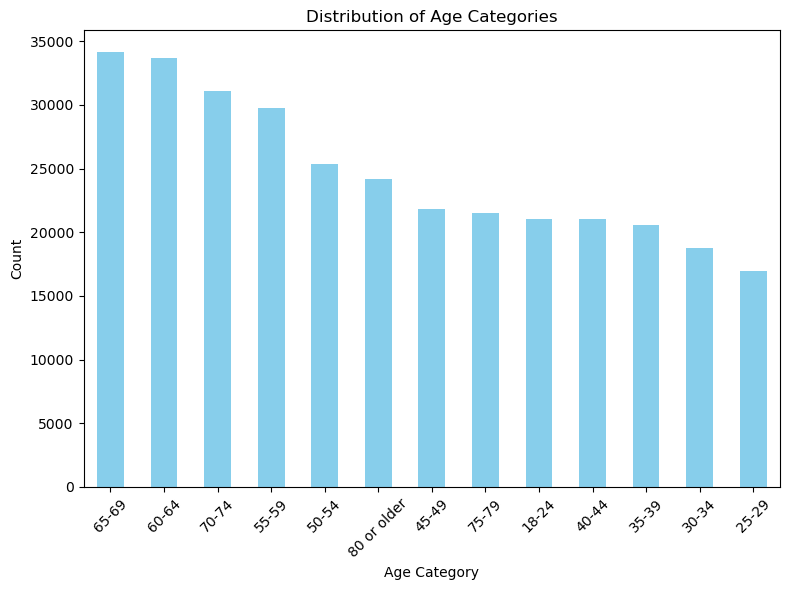

In [9]:
#sorted

age_counts = df['AgeCategory'].value_counts(ascending=False)

# Plotting the value counts
plt.figure(figsize=(8, 6))
age_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Age Categories')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability 
plt.tight_layout()
plt.show()

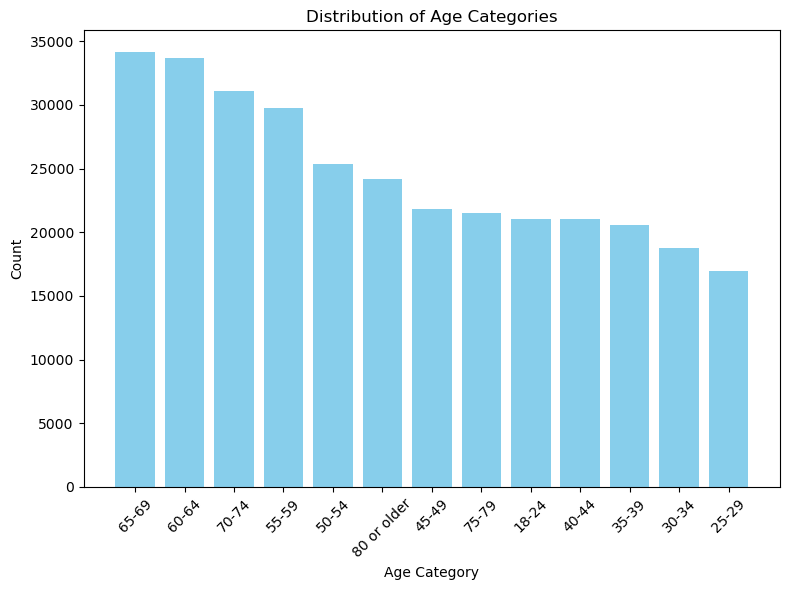

In [10]:
#no sorting


age_counts = df['AgeCategory'].value_counts()

# Resetting the index to convert the Series to a DataFrame
age_counts_df = age_counts.reset_index()
age_counts_df.columns = ['AgeCategory', 'Count']  # Rename columns for clarity

# Plotting the value counts
plt.figure(figsize=(8, 6))
plt.bar(age_counts_df['AgeCategory'], age_counts_df['Count'], color='skyblue')
plt.title('Distribution of Age Categories')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability 
plt.tight_layout()
plt.show()


In [11]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [12]:
df_Age_category =df[['AgeCategory']]
df_Age_category.value_counts()

AgeCategory
65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: count, dtype: int64

In [13]:
# Here I created a short list of the required columns


df_short = df[['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'PhysicalActivity', 'SleepTime']]
df_short

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,PhysicalActivity,SleepTime
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,5.0
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,Yes,7.0
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,8.0
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,6.0
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,Yes,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,No,6.0
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,Yes,5.0
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,Yes,6.0
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,12.0


In [14]:
#Checking the Data type

df_short.info()

df_short.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  PhysicalActivity  319795 non-null  object 
 12  SleepTime         319795 non-null  float64
dtypes: float64(4), object(9)
memory usage: 31.7+ MB


,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [15]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


### Converting Categorical data to numeric - SiriM
https://medium.com/geekculture/boruta-feature-selection-explained-in-python-7ae8bf4aa1e7#:~:text=Boruta%20automates%20the%20process%20of,to%20your%20Machine%20Learning%20problem.

In [19]:
df_short["HeartDisease"] = pd.factorize(df_short["HeartDisease"])[0]
df_short["Smoking"] = pd.factorize(df_short["Smoking"])[0]
df_short["AlcoholDrinking"] = pd.factorize(df_short["AlcoholDrinking"])[0]
df_short["Stroke"] = pd.factorize(df_short["Stroke"])[0]
df_short["DiffWalking"] = pd.factorize(df_short["DiffWalking"])[0]
df_short["Sex"] = pd.factorize(df_short["Sex"])[0]
df_short["AgeCategory"] = pd.factorize(df_short["AgeCategory"])[0]
df_short["Race"] = pd.factorize(df_short["Race"])[0]
df_short["PhysicalActivity"] = pd.factorize(df_short["PhysicalActivity"])[0]
# additional cleaning
#df_short.dropna(inplace =True)
#df_short.drop("id", axis =1, inplace = True)
#df_short.reset_index(inplace=True, drop=True)
df_short.head()

/var/folders/j1/xj6595fs6hbbkl4ydxht18zc0000gn/T/ipykernel_5142/2634578823.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_short["HeartDisease"] = pd.factorize(df_short["HeartDisease"])[0]
/var/folders/j1/xj6595fs6hbbkl4ydxht18zc0000gn/T/ipykernel_5142/2634578823.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_short["Smoking"] = pd.factorize(df_short["Smoking"])[0]
/var/folders/j1/xj6595fs6hbbkl4ydxht18zc0000gn/T/ipykernel_5142/2634578823.py:3: SettingWithCopyWarning: 
A value is trying to be 

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,PhysicalActivity,SleepTime
0,0,16.60,0,0,0,3.0,30.0,0,0,0,0,0,5.0
1,0,20.34,1,0,1,0.0,0.0,0,0,1,0,0,7.0
2,0,26.58,0,0,0,20.0,30.0,0,1,2,0,0,8.0
3,0,24.21,1,0,0,0.0,0.0,0,0,3,0,1,6.0
4,0,23.71,1,0,0,28.0,0.0,1,0,4,0,0,8.0


In [17]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [ ]:
# Just like that :), wanted to check if there is a relation between  BMI and Sleep -
# Created small data set which contan 2 Columns

df_bmi_sleep = df_short[["BMI", "SleepTime"]]
df_bmi_sleep

In [ ]:
#Calculating the Corr between the 2 

correlation_matrix = df_bmi_sleep.corr()
correlation_matrix

In [ ]:
### This is only corr sleep and BMI

plt.figure(figsize=(12, 8))  # Adjust the figure size 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Converting Data

In [ ]:

# to see the corr for all of them we will eed to convert the data to int to enable the system to calculate it 
#as now we have catogorial data in some columns





#LabelEncoder, its a function which will convert catogorial to int

from sklearn.preprocessing import LabelEncoder


# List of columns containing categorical data
categorical_cols = ['Sex', 'AgeCategory', 'Race', 'Diabetic', 'Asthma', 
                    'KidneyDisease', 'SkinCancer', 'HeartDisease',"Smoking",
                    "AlcoholDrinking", "Stroke", "PhysicalActivity", "DiffWalking" ,
                    "GenHealth"]  # Update this list with your categorical columns

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Convert categorical variables to numerical labels
#for col in categorical_cols:
#    df[col] = label_encoder.fit_transform(df[col].astype(str))








### Converting Categorical data to numeric - SiriM
https://medium.com/geekculture/boruta-feature-selection-explained-in-python-7ae8bf4aa1e7#:~:text=Boruta%20automates%20the%20process%20of,to%20your%20Machine%20Learning%20problem.

In [ ]:
df["HeartDisease"] = pd.factorize(df["HeartDisease"])[0]
df["Smoking"] = pd.factorize(df["Smoking"])[0]
df["AlcoholDrinking"] = pd.factorize(df_short["AlcoholDrinking"])[0]
df["Stroke"] = pd.factorize(df["Stroke"])[0]
df["DiffWalking"] = pd.factorize(df["DiffWalking"])[0]
df["Sex"] = pd.factorize(df["Sex"])[0]
df["AgeCategory"] = pd.factorize(df["AgeCategory"])[0]
df["Race"] = pd.factorize(df["Race"])[0]
df["PhysicalActivity"] = pd.factorize(df["PhysicalActivity"])[0]
df["Diabetic"] = pd.factorize(df["Diabetic"])[0]
df["Asthma"] = pd.factorize(df["Asthma"])[0]
df["GenHealth"] = pd.factorize(df["GenHealth"])[0]
df["SkinCancer"] = pd.factorize(df["SkinCancer"])[0]
df["KidneyDisease"] = pd.factorize(df["KidneyDisease"])[0]
df["MentalHealth"] = pd.factorize(df["MentalHealth"])[0]

In [ ]:
# Separate features and target variable
target = 'HeartDisease'
#features = [col for col in df.columns if col != target]
features = [col for col in df_short.columns if col != target]
X = df[features]
y = df[target]


In [ ]:

df
#df_short

In [ ]:
#We can see here that all the data converted we dont have any object(str)
df.info()
#df_short.info()

In [ ]:
# Now we can proceed with your model fitting process

# Finding Relations

In [ ]:
# Compute the correlation matrix
correlation_matrix = df.corr()


# Sort correlations with respect to 'HeartDisease'
correlation_with_target = correlation_matrix['HeartDisease'].sort_values(ascending=False)

# Remove the target variable from the list
correlation_with_target = correlation_with_target.drop('HeartDisease')


#This is the corr of Heart Disease and all other factors
correlation_with_target

In [ ]:

# Extract correlation values for HeartDisease and other factors
correlation_values = df[correlation_with_target.index].corrwith(df['HeartDisease'])

# Construct a new correlation matrix based on the correlation with HeartDisease
correlation_with_heart = df[correlation_with_target.index].corrwith(df['HeartDisease'])

# Reshape the correlation values to create a correlation matrix
correlation_matrix_heart = correlation_with_heart.values.reshape(1, -1)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_heart, annot=True, fmt='.2f', cmap='coolwarm',
            xticklabels=correlation_with_heart.index, yticklabels=['HeartDisease'])
plt.title('Correlation with Heart Disease')
plt.xlabel('Factors')
plt.ylabel('Heart Disease')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
#Same but diffrent ploting:


# Create a horizontal bar plot
plt.figure(figsize=(10, 8))
correlation_values.plot(kind='barh', color='skyblue')
plt.xlabel('Correlation with Heart Disease')
plt.title('Correlation of Factors with Heart Disease')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


In [ ]:
# Here to show visual Data, but its all the Data (its diffrent from the previouse corr)

# Compute the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))  # Adjust the figure size 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")  # cmap can be changed for different color palettes
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
df.columns



# Answering the questions

# What is the most important factor in determining heart disease?

In [ ]:
#as My understanding the most important factor, is the factor which have more corr , If you agree the next is true



# Calculate correlations with 'HeartDisease'
correlation_with_heart = df.corr()['HeartDisease'].drop('HeartDisease').abs().sort_values(ascending=False)

# Display the most correlated factor
most_important_factor = correlation_with_heart.index[0]
print(f"The most important factor in determining heart disease is: {most_important_factor}")


In [ ]:

#This is extra just to test, its machine learing - Random Forest Classifier Modeel




from sklearn.ensemble import RandomForestClassifier


target = 'HeartDisease'
features = [ 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer']  # Include all relevant features

# Separate features and target variable
X = df[features]
y = df[target]

# Initialize RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
clf.fit(X, y)

# Feature importances
feature_importances = pd.DataFrame({'Feature': features, 'Importance': clf.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Most important factor
most_important = feature_importances.iloc[0]['Feature']
print(f"The most important factor in determining heart disease is: {most_important}")


In [ ]:
#This is ploting the MAhine Learing Model NOT The only corr- 

# Assuming 'feature_importances' contains your DataFrame with feature importances

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances for Heart Disease Prediction')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()


# What are the highest coorelated factors for heart disease?

In [ ]:



# Compute the correlation matrix
correlation_matrix = df.corr()

# Sort correlations with respect to 'HeartDisease'
correlation_with_target = correlation_matrix['HeartDisease'].sort_values(ascending=False)

# Remove the target variable from the list
correlation_with_target = correlation_with_target.drop('HeartDisease')

# Filter out factors with highest absolute correlation values
top_factors = correlation_with_target.abs().nlargest(5).index  # Change '5' to show more or fewer factors
top_factors



### Need Revision

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = df.corr()

# Sort correlations with respect to 'HeartDisease'
correlation_with_target = correlation_matrix['HeartDisease'].sort_values(ascending=False)

# Remove the target variable from the list
correlation_with_target = correlation_with_target.drop('HeartDisease')

# Filter out factors with highest absolute correlation values
top_factors = correlation_with_target.abs().nlargest(20).index  # Change '5' to show more or fewer factors

# Filter the correlation matrix for top factors
top_factors_corr = df[top_factors].corr()

# Plotting the highest correlated factors
plt.figure(figsize=(15, 6))
sns.heatmap(top_factors_corr, annot=True, cmap='coolwarm')
plt.title('Correlation of Top Factors with Heart Disease')
plt.show()


# What groups are the most at risk for heart attacks?

In [ ]:

# Grouping by 'AgeCategory' and calculating the count of heart attacks
age_groups = df.groupby('AgeCategory')['HeartDisease'].sum()

# Visualizing the count of heart attacks by age category
age_groups.plot(kind='bar', figsize=(10, 6), title='Heart Attacks by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Number of Heart Attacks')
plt.show()


In [ ]:

# Grouping by 'Smoking' and calculating the count of heart attacks
smoking_groups = df.groupby('Smoking')['HeartDisease'].sum()

# Visualizing the count of heart attacks among smokers and non-smokers
smoking_groups.plot(kind='bar', figsize=(8, 5), title='Heart Attacks by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Number of Heart Attacks')
plt.xticks([0, 1], ['Non-Smoker', 'Smoker'])
plt.show()


In [ ]:

# Creating a pivot table to analyze heart attacks by age category and gender
age_gender_pivot = df.pivot_table(index='AgeCategory', columns='Sex', values='HeartDisease', aggfunc='sum')

# Visualizing heart attacks by age category and gender
age_gender_pivot.plot(kind='bar', figsize=(10, 6), title='Heart Attacks by Age Category and Gender')
plt.xlabel('Age Category')
plt.ylabel('Number of Heart Attacks')
plt.show()


# What could be the most important choices made to reverse the potential negative outcoes of heart disease?

1. Analyze Health-Related Factors:
Identify Positive Influences: Look at factors like physical activity, diet, medication adherence, and other health behaviors that are known to positively impact heart health.

In [ ]:

# Grouping by 'PhysicalActivity' and calculating heart disease occurrences
physical_activity_groups = df.groupby('PhysicalActivity')['HeartDisease'].sum()

# Visualizing heart attacks based on physical activity levels
physical_activity_groups.plot(kind='bar', figsize=(8, 5), title='Heart Attacks by Physical Activity Level')
plt.xlabel('Physical Activity Level')
plt.ylabel('Number of Heart Attacks')
plt.show()


2. Lifestyle and Behavioral Analysis:
Evaluate Lifestyle Choices: Consider factors like smoking cessation, healthy diet choices, reduced alcohol intake, and stress management that contribute to better heart health outcomes.

In [ ]:

# Grouping by 'Smoking' and 'AlcoholDrinking' to analyze heart disease occurrences
lifestyle_groups = df.groupby(['Smoking', 'AlcoholDrinking'])['HeartDisease'].sum()

# Visualizing heart attacks based on smoking and alcohol consumption
# This might require different visualization techniques like stacked bar plots or heatmaps
# Here's an example using a heatmap:
lifestyle_pivot = lifestyle_groups.unstack()
sns.heatmap(lifestyle_pivot, annot=True, cmap='Blues')
plt.title('Heart Attacks by Smoking and Alcohol Drinking')
plt.xlabel('Alcohol Drinking')
plt.ylabel('Smoking')
plt.show()


3. Treatment and Management:
Examine Treatment and Management: Explore the impact of regular check-ups, medication adherence, and timely medical interventions on reducing the severity or complications of heart disease.

In [ ]:

# Grouping by 'RegularCheckup' and calculating heart disease occurrences
checkup_groups = df.groupby('PhysicalHealth')['HeartDisease'].sum()

# Visualizing heart attacks based on regular check-ups
checkup_groups.plot(kind='bar', figsize=(8, 5), title='Heart Attacks by Physical Health')
plt.xlabel('Physical Health')
plt.ylabel('Number of Heart Attacks')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


In [ ]:
df.columns

In [ ]:
df[["PhysicalHealth"]].value_counts()

# How will this data help hospitals to make informed decisions and develop effective business plans and strategies?


# Heart Health Analysis
##### This is for revision, I used outside sourse just for reference

## Risk Factor Analysis:
Identify High-Risk Groups: Analyze columns like 'Smoking', 'AlcoholDrinking', 'Diabetic', 'Stroke', 'BMI', 'PhysicalHealth', 'MentalHealth', etc., to identify high-risk groups susceptible to heart disease or related health issues.

## Health Behavior and Lifestyle:
Promote Healthier Behaviors: Assess 'PhysicalActivity', 'DiffWalking', 'SleepTime', and 'PhysicalHealth' to understand how lifestyle choices impact heart health. Hospitals can encourage healthier habits among patients.

## Demographic Insights:
Tailored Care for Demographics: Utilize 'Sex', 'AgeCategory', 'Race', etc., to understand demographic trends in heart disease prevalence. Hospitals can create targeted programs for specific demographics.

## Comorbidity and Complications:
Address Comorbidities: Explore 'Asthma', 'KidneyDisease', 'SkinCancer', and other health conditions to address potential complications or associations with heart disease.

## Health Management Strategies:
Develop Interventions: Use 'GenHealth' to gauge overall health perception. Hospitals can focus on interventions to improve patients' perceptions and self-care.

### Strategies and Decisions:
- **Strategic Resource Allocation:** Prioritize resources based on identified high-risk groups or prevalent conditions.
- **Tailored Interventions:** Develop targeted health programs or educational campaigns addressing identified risk factors.
- **Improved Patient Care:** Implement personalized care plans based on demographic insights and health behaviors.
- **Preventive Healthcare:** Focus on preventive measures targeting lifestyle choices contributing to heart disease.
- **Data-Informed Planning:** Use insights for long-term planning, resource allocation, and strategic development.

By leveraging this data, hospitals can tailor their services, interventions, and strategies to better address heart disease and related health issues within their communities, ultimately enhancing patient care and outcomes.


### Risk Factor Analysis:

In [ ]:
# Analyzing risk factors for heart disease
risk_factors = ['Smoking', 'AlcoholDrinking', 'Diabetic', 'Stroke', 'BMI', 'PhysicalHealth', 'MentalHealth']

# Summarizing risk factors for patients with heart disease
df_heart_disease = df[df['HeartDisease'] == 1]  # Selecting patients with heart disease
risk_factor_summary = df_heart_disease[risk_factors].sum()

# Visualizing risk factor summary
risk_factor_summary.plot(kind='bar', figsize=(10, 6), title='Sum of Risk Factors for Heart Disease Patients')
plt.xlabel('Risk Factors')
plt.ylabel('Sum')
plt.show()


### Health Behavior and Lifestyle:

In [ ]:
# Analyzing health behaviors impacting heart health
health_behaviors = ['PhysicalActivity', 'DiffWalking', 'SleepTime', 'PhysicalHealth']

# Understanding the impact of health behaviors on heart disease
for behavior in health_behaviors:
    plt.figure()
    df.groupby(behavior)['HeartDisease'].mean().plot(kind='bar', color='skyblue')
    plt.title(f'Average Heart Disease Occurrence by {behavior}')
    plt.xlabel(behavior)
    plt.ylabel('Average Heart Disease')
    plt.show()


### Demographic Insights:

In [ ]:
# Analyzing demographic trends in heart disease
demographics = ['Sex', 'AgeCategory', 'Race']

# Understanding heart disease prevalence by demographics
for demo in demographics:
    plt.figure()
    df.groupby(demo)['HeartDisease'].mean().plot(kind='bar', color='lightcoral')
    plt.title(f'Average Heart Disease Occurrence by {demo}')
    plt.xlabel(demo)
    plt.ylabel('Average Heart Disease')
    plt.show()


### Comorbidity and Complications:

In [ ]:
# Exploring comorbidities and complications
comorbidities = ['Asthma', 'KidneyDisease', 'SkinCancer']

# Analyzing associations between comorbidities and heart disease
for comorbidity in comorbidities:
    plt.figure()
    df.groupby(comorbidity)['HeartDisease'].mean().plot(kind='bar', color='lightgreen')
    plt.title(f'Average Heart Disease Occurrence with {comorbidity}')
    plt.xlabel(comorbidity)
    plt.ylabel('Average Heart Disease')
    plt.show()


### Health Management Strategies:

In [ ]:
# Understanding overall health perception
plt.figure()
df.groupby('GenHealth')['HeartDisease'].mean().plot(kind='bar', color='salmon')
plt.title('Average Heart Disease Occurrence by General Health Perception')
plt.xlabel('General Health Perception')
plt.ylabel('Average Heart Disease')
plt.show()


# EXTRA